In [70]:
# Cell 1: Import necessary libraries
%matplotlib widget
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [80]:
# Cell 2: Load CSV data and scale z-axis (cross-section) by 1e+42

df = pd.read_csv('2d_xsec_data.csv', header=None, names=['p_parallel_mu', 'p_T_mu', 'cross_section', 'err', 'cross_section_mc'])


# Scale the cross-section data by 1e+42 (since the typical value is 1e-42)
df['cross_section'] *= 1e+42
df['err'] *= 1e+42
df['cross_section_mc'] *= 1e+42


# Preview the data to ensure it's loaded correctly (optional)
df.head()

,p_parallel_mu,p_T_mu,cross_section,err,cross_section_mc
0,1.75,0.0375,1.06972,0.235131,0.55430
1,1.75,0.1125,3.08347,0.598406,2.10808
2,1.75,0.2000,9.49509,1.885660,6.26810
3,1.75,0.2875,11.78870,1.582690,7.99897
4,1.75,0.3625,14.19690,3.622720,10.33530


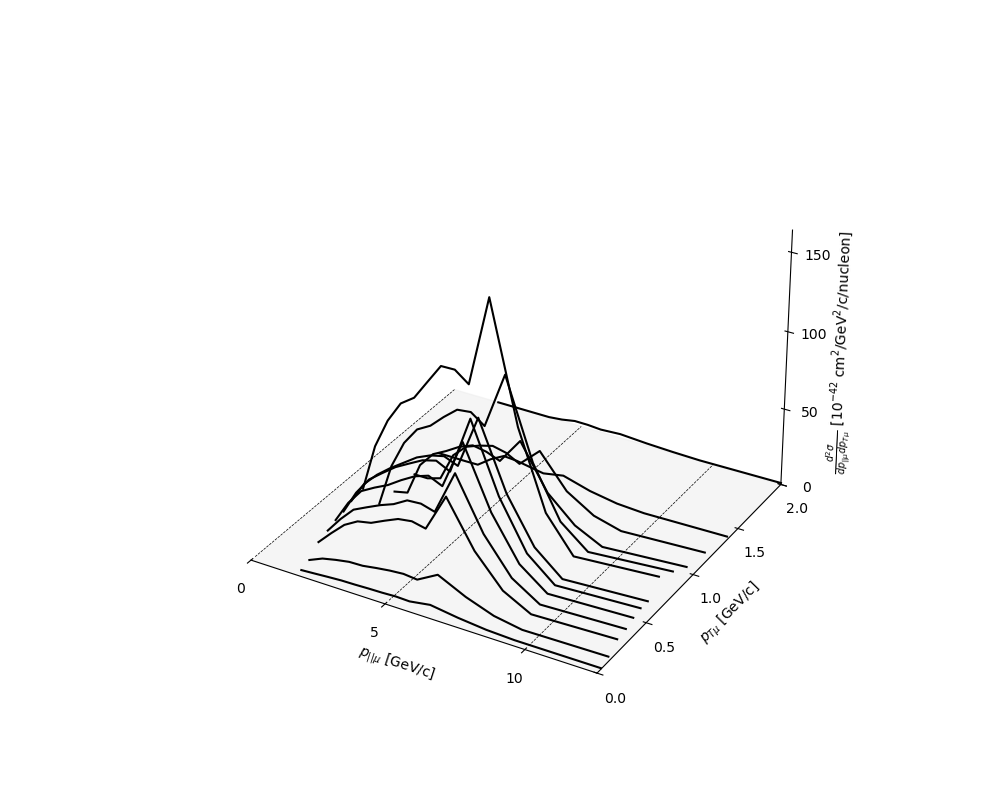

In [76]:
# Cell 3: Plot the data interactively
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

norm = mcolors.Normalize(vmin=df['cross_section'].min(), vmax=df['cross_section'].max())  # Normalize the cross-section values
cmap = cm.viridis  # You can choose different colormaps like 'plasma', 'cividis', etc.

'''
# Loop through the unique 'p_T_mu' values to plot separate points with offsets and color based on z-values
for i, p_T_value in enumerate(df['p_T_mu'].unique()):
    subset = df[df['p_T_mu'] == p_T_value]
    z_vals = subset['cross_section']  # These are your z-values
    colors = cmap(norm(z_vals))  # Map z-values to colors using the colormap
    ax.plot(subset['p_parallel_mu'], np.full_like(subset['p_parallel_mu'], p_T_value + i * offset), z_vals, color=colors, linestyle='--', linewidth=1)

ax.scatter(subset['p_parallel_mu'], np.full_like(subset['p_parallel_mu'], p_T_value + i * offset), z_vals, color=colors, s=10)
'''


# Loop through the unique 'p_T_mu' values to plot separate curves
for p_T_value in df['p_T_mu'].unique():
    subset = df[df['p_T_mu'] == p_T_value]
    ax.plot(subset['p_parallel_mu'], np.full_like(subset['p_parallel_mu'], p_T_value), subset['cross_section'], color='k')

# Set labels (this is the part you can tweak easily)
ax.set_xlabel('$p_{|| \mu}$ [GeV/c]')
ax.set_ylabel('$p_{T \mu}$ [GeV/c]')
ax.set_zlabel(r'$\frac{d^2 \sigma}{d p_{|| \mu} d p_{T \mu}}$ [$10^{-42}$ cm$^2$/GeV$^2$/c/nucleon]')

# Set appropriate limits based on the data (you can adjust these if needed)
ax.set_xlim(df['p_parallel_mu'].min(), df['p_parallel_mu'].max())
ax.set_ylim(df['p_T_mu'].min(), df['p_T_mu'].max())
ax.set_zlim(df['cross_section'].min(), df['cross_section'].max())

#ax.set_axis_off()
#ax.xaxis.pane.set_visible(False)  # Hide the xz wall
#ax.yaxis.pane.set_visible(False)  # Hide the yz wall

#ax.xaxis.set_label_position('none')
#ax.xaxis.set_ticks_position('none')
#ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.xaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.fill = False
ax.yaxis.pane.set_edgecolor('w')
ax.grid(False)

# axis ticks + grid lines
yticks = np.arange(0, 2.25, 0.5)  # ptmu ticks every 0.5 from 0-2.25
ax.set_yticks(yticks)
xticks = np.arange(0, 13, 5)  # pzmu ticks every 5 from 0-13
ax.set_xticks(xticks)
zticks = np.arange(0, 200, 50)  # xsec ticks every 50 from 0-200
ax.set_zticks(zticks)

for tick in xticks:
    ax.plot([tick, tick], [df['p_T_mu'].min(), df['p_T_mu'].max()], [0,0], color='k', linewidth=0.5, linestyle='--')




# Show the plot interactively
plt.show()

In [81]:
bbox = fig.bbox_inches.from_bounds(1, 1, 8, 6)
plt.savefig('2d_pzmu_ptmu_xsec.png', bbox_inches=bbox, facecolor='#AAAAAA')